In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Advertising.csv")

In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [13]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [15]:
df.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:>

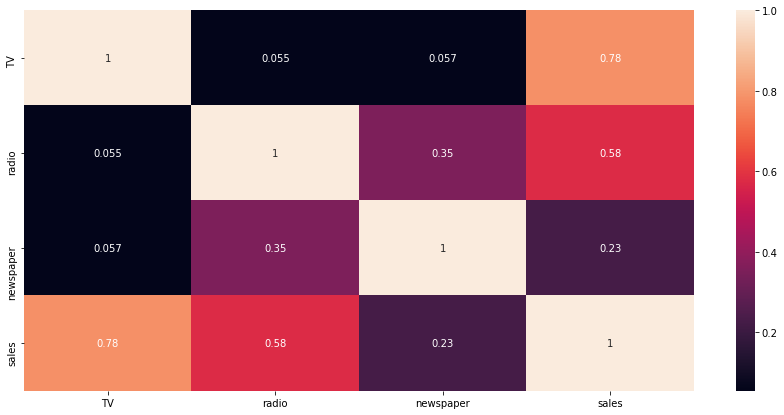

In [16]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


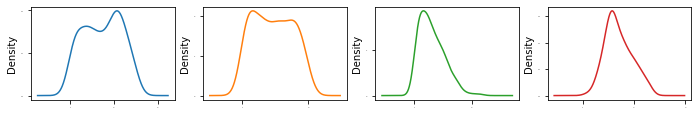

In [18]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

In [19]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [20]:
x.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [22]:
type(x_new)

numpy.ndarray

In [23]:
x=pd.DataFrame(x_new,columns=x.columns)

In [24]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [25]:
x.skew().sort_values(ascending=False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [26]:
sk=x.skew()

In [27]:
sk[np.abs(sk)>0.25].all()

True

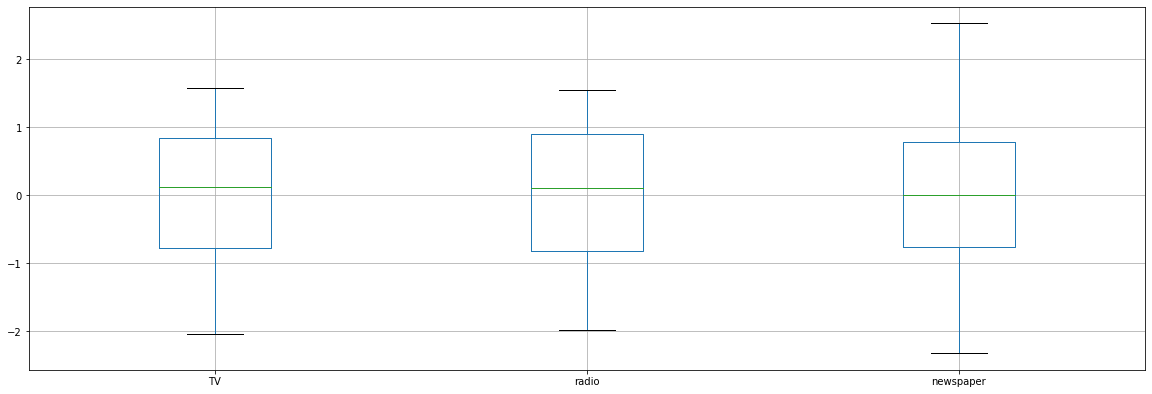

In [28]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [29]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

True

In [30]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [31]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [34]:
for i in range (0,200) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.9129495390360743
at random state 0,the testing accuracy is :0.8838865502815021


at random state 1,the training accuracy is :0.9071938747219684
at random state 1,the testing accuracy is :0.8962223515318661


at random state 2,the training accuracy is :0.9183341288802332
at random state 2,the testing accuracy is :0.8134661880809735


at random state 3,the training accuracy is :0.9044922374546075
at random state 3,the testing accuracy is :0.9176823268482114


at random state 4,the training accuracy is :0.9058334490016561
at random state 4,the testing accuracy is :0.8999332568068064


at random state 5,the training accuracy is :0.9057996837685972
at random state 5,the testing accuracy is :0.9111155103873196


at random state 6,the training accuracy is :0.9031637800959937
at random state 6,the testing accuracy is :0.9263228920019168


at random state 7,the training accuracy is :0.9024328978288425
at random state 7,the testing accuracy is :0.922

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
pred_test=lr.predict(x_test)

In [38]:
print(r2_score(y_test,pred_test))

0.9042263224424736


## CROSS VALIDATION

In [39]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 4 the cv score is 0.9010704953541406 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is -0.7133071040198937and accuracy score for testing is 0.9042263224424736


At cross fold 8 the cv score is 0.895822

## Plot the Data

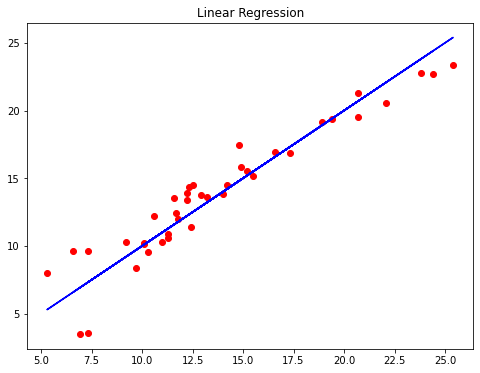

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [42]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [44]:
ls=Lasso(alpha=.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9035898285760036

In [45]:
cv_score=cross_val_score(ls,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean

0.9015254859944326

## Ensemble technique:

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [47]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [48]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 97.92561849198731
Cross Val Score: 97.78435749318142


## we are getting our model accuracy and cross validation both as around 97 % which shows our model is performing very good

In [49]:
import pickle

In [50]:
filename='Advertising.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [51]:
loaded_model= pickle.load(open('Advertising.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9792561849198731


In [52]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","origial"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,11.782,20.77,11.639,11.717,10.644,23.115,9.75,15.339,16.526,21.088,...,8.154,10.158,11.794,25.127,14.674,10.962,9.695,13.41,7.955,12.011
origial,11.782,20.77,11.639,11.717,10.644,23.115,9.75,15.339,16.526,21.088,...,8.154,10.158,11.794,25.127,14.674,10.962,9.695,13.41,7.955,12.011
